# KaggleMart vs KaggleRama

## Import the required libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import the train dataset 

In [2]:
sales = pd.read_csv('train.csv')
sales_test = pd.read_csv('test.csv')

## Understanding the data

In [3]:
sales.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
sales.describe()

,row_id,num_sold
count,26298.000000,26298.000000
mean,13148.500000,387.533577
std,7591.723026,266.076193
min,0.000000,70.000000
25%,6574.250000,190.000000
50%,13148.500000,315.000000
75%,19722.750000,510.000000
max,26297.000000,2884.000000


In [5]:
sales.shape

(26298, 6)

In [6]:
sales.isnull().sum()                    # to check the number of null values overall

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

## Get unique values for categorical features 

<AxesSubplot:xlabel='country', ylabel='Count'>

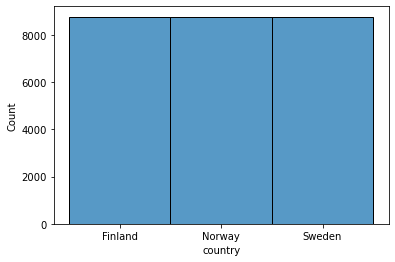

In [9]:
sns.histplot(sales['country'])

In [7]:
sales['store'].unique()

array(['KaggleMart', 'KaggleRama'], dtype=object)

In [8]:
sales['country'].unique()

array(['Finland', 'Norway', 'Sweden'], dtype=object)

In [9]:
sales['product'].unique()

array(['Kaggle Mug', 'Kaggle Hat', 'Kaggle Sticker'], dtype=object)

## Store-wise total units sold

In [10]:
total_sales = sales.groupby(sales['store']).sum()
total_sales

,row_id,num_sold
store,,
KaggleMart,172869903,3715368
KaggleRama,172909350,6475990


In [11]:
total_sales.drop(['row_id'], axis=1, inplace=True)

In [12]:
total_sales

,num_sold
store,
KaggleMart,3715368
KaggleRama,6475990


## Total units sold considering all the cat features 

In [13]:
total_units = sales.groupby(['store', 'country', 'product']).sum()
total_units.drop(['row_id'], axis=1, inplace=True)
total_units

num_sold
store      country product                 
KaggleMart Finland Kaggle Hat        529583
                   Kaggle Mug        298337
                   Kaggle Sticker    150548
           Norway  Kaggle Hat        868777
                   Kaggle Mug        488515
                   Kaggle Sticker    247753
           Sweden  Kaggle Hat        612472
                   Kaggle Mug        344628
                   Kaggle Sticker    174755
KaggleRama Finland Kaggle Hat        918862
                   Kaggle Mug        520278
                   Kaggle Sticker    263319
           Norway  Kaggle Hat       1514119
                   Kaggle Mug        853659
                   Kaggle Sticker    431883
           Sweden  Kaggle Hat       1068652
                   Kaggle Mug        600870
                   Kaggle Sticker    304348

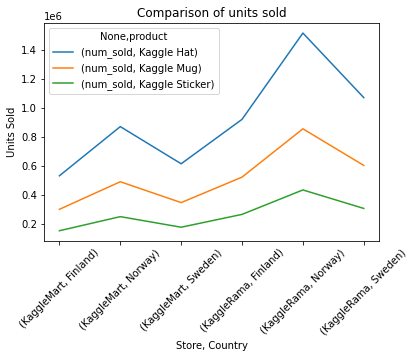

In [14]:
total_units.unstack().plot()
plt.xticks(rotation=45)
plt.xlabel('Store, Country')
plt.ylabel('Units Sold')
plt.title('Comparison of units sold')
plt.show()

## Format the date feature 

In [15]:
sales['date'].dtype

dtype('O')

In [16]:
sales['date'] = pd.to_datetime(sales['date'])

In [17]:
sales['date'].dtype

dtype('<M8[ns]')

In [18]:
sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day

In [19]:
sales.head()

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


In [20]:
sales.drop('date', axis=1, inplace=True)

In [21]:
sales.tail()

,row_id,country,store,product,num_sold,year,month,day
26293,26293,Sweden,KaggleMart,Kaggle Hat,823,2018,12,31
26294,26294,Sweden,KaggleMart,Kaggle Sticker,250,2018,12,31
26295,26295,Sweden,KaggleRama,Kaggle Mug,1004,2018,12,31
26296,26296,Sweden,KaggleRama,Kaggle Hat,1441,2018,12,31
26297,26297,Sweden,KaggleRama,Kaggle Sticker,388,2018,12,31


In [22]:
sales_test['date'] = pd.to_datetime(sales_test['date'])

In [23]:
sales_test['year'] = sales_test['date'].dt.year
sales_test['month'] = sales_test['date'].dt.month
sales_test['day'] = sales_test['date'].dt.day

In [24]:
sales.head()

,row_id,country,store,product,num_sold,year,month,day
0,0,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,1,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,2,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,3,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,4,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


In [25]:
sales_test.drop(['date'], axis=1, inplace=True)

In [26]:
sales_test.tail()

,row_id,country,store,product,year,month,day
6565,32863,Sweden,KaggleMart,Kaggle Hat,2019,12,31
6566,32864,Sweden,KaggleMart,Kaggle Sticker,2019,12,31
6567,32865,Sweden,KaggleRama,Kaggle Mug,2019,12,31
6568,32866,Sweden,KaggleRama,Kaggle Hat,2019,12,31
6569,32867,Sweden,KaggleRama,Kaggle Sticker,2019,12,31


# Modelling

In [27]:
# One hot encoder
sales = pd.get_dummies(sales)
sales_test = pd.get_dummies(sales_test)

In [28]:
X_train = sales.drop(['num_sold'], axis=1)
y_train = sales['num_sold']

X_train

,row_id,year,month,day,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,0,2015,1,1,1,0,0,1,0,0,1,0
1,1,2015,1,1,1,0,0,1,0,1,0,0
2,2,2015,1,1,1,0,0,1,0,0,0,1
3,3,2015,1,1,1,0,0,0,1,0,1,0
4,4,2015,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26293,26293,2018,12,31,0,0,1,1,0,1,0,0
26294,26294,2018,12,31,0,0,1,1,0,0,0,1
26295,26295,2018,12,31,0,0,1,0,1,0,1,0
26296,26296,2018,12,31,0,0,1,0,1,1,0,0


In [31]:
from xgboost import XGBRegressor 
# define model
model = XGBRegressor(colsample_bytree = 0.7,
                     learning_rate = 0.07,
                     max_depth= 10,
                     min_child_weight= 4,
                     n_estimators = 700,
                     subsample = 0.7)
# fit model
model.fit(X_train, y_train)
# make a prediction
y_pred = model.predict(sales_test)

y_pred

array([ 469.07205,  522.6668 ,  185.58174, ...,  985.3731 , 1470.3038 ,
        386.74557], dtype=float32)

In [33]:
output = pd.read_csv('sample_submission.csv')
output['num_sold'] = y_pred

In [34]:
output['num_sold'] = output['num_sold'].apply(np.ceil)
output.to_csv('Pranali_submission1.csv',index =False)